In [87]:
import pandas as pd
import numpy as np

In [135]:
df = pd.read_csv('Data of Orders.csv')

In [137]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Postal Code,Product ID,Sales,Quantity,Discount,Profit
0,1,CA-2022-152156,08/11/2022,11/11/2022,Second Class,CG-12520,Consumer,42420,FUR-BO-10001798,26196,2,0,419136
1,2,CA-2022-152156,08/11/2022,11/11/2022,Second Class,CG-12520,Consumer,42420,FUR-CH-10000454,73194,3,0,219582
2,3,CA-2022-138688,12/06/2022,16/06/2022,Second Class,DV-13045,Corporate,90036,OFF-LA-10000240,1462,2,0,68714
3,4,US-2021-108966,11/10/2021,18/10/2021,Standard Class,SO-20335,Consumer,33311,FUR-TA-10000577,9575775,5,45,-383031
4,5,US-2021-108966,11/10/2021,18/10/2021,Standard Class,SO-20335,Consumer,33311,OFF-ST-10000760,22368,2,2,25164


In [93]:
df.shape

(9994, 13)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Row ID       9994 non-null   int64 
 1   Order ID     9994 non-null   object
 2   Order Date   9994 non-null   object
 3   Ship Date    9994 non-null   object
 4   Ship Mode    9994 non-null   object
 5   Customer ID  9994 non-null   object
 6   Segment      9994 non-null   object
 7   Postal Code  9994 non-null   int64 
 8   Product ID   9994 non-null   object
 9   Sales        9994 non-null   int64 
 10  Quantity     9994 non-null   int64 
 11  Discount     9994 non-null   int64 
 12  Profit       9994 non-null   int64 
dtypes: int64(6), object(7)
memory usage: 1015.1+ KB


In [97]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9.994000e+03,9994.000000,9994.000000,9.994000e+03
mean,4997.500000,55231.117070,1.132271e+05,3.789574,1.754653,1.800957e+05
std,2885.163629,32023.901458,5.186212e+05,2.225110,3.119014,1.722971e+06
min,1.000000,1040.000000,3.000000e+00,1.000000,0.000000,-3.839990e+07
25%,2499.250000,23223.000000,2.516000e+03,2.000000,0.000000,2.245000e+03
50%,4997.500000,56430.500000,1.108800e+04,3.000000,2.000000,3.630900e+04
75%,7495.750000,90008.000000,5.399175e+04,5.000000,2.000000,1.509840e+05
max,9994.000000,99301.000000,2.396266e+07,14.000000,45.000000,6.719981e+07


In [99]:
df.isnull().sum()

Row ID         0
Order ID       0
Order Date     0
Ship Date      0
Ship Mode      0
Customer ID    0
Segment        0
Postal Code    0
Product ID     0
Sales          0
Quantity       0
Discount       0
Profit         0
dtype: int64

In [101]:
df.duplicated().sum()

0

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
sns.set(style="whitegrid")

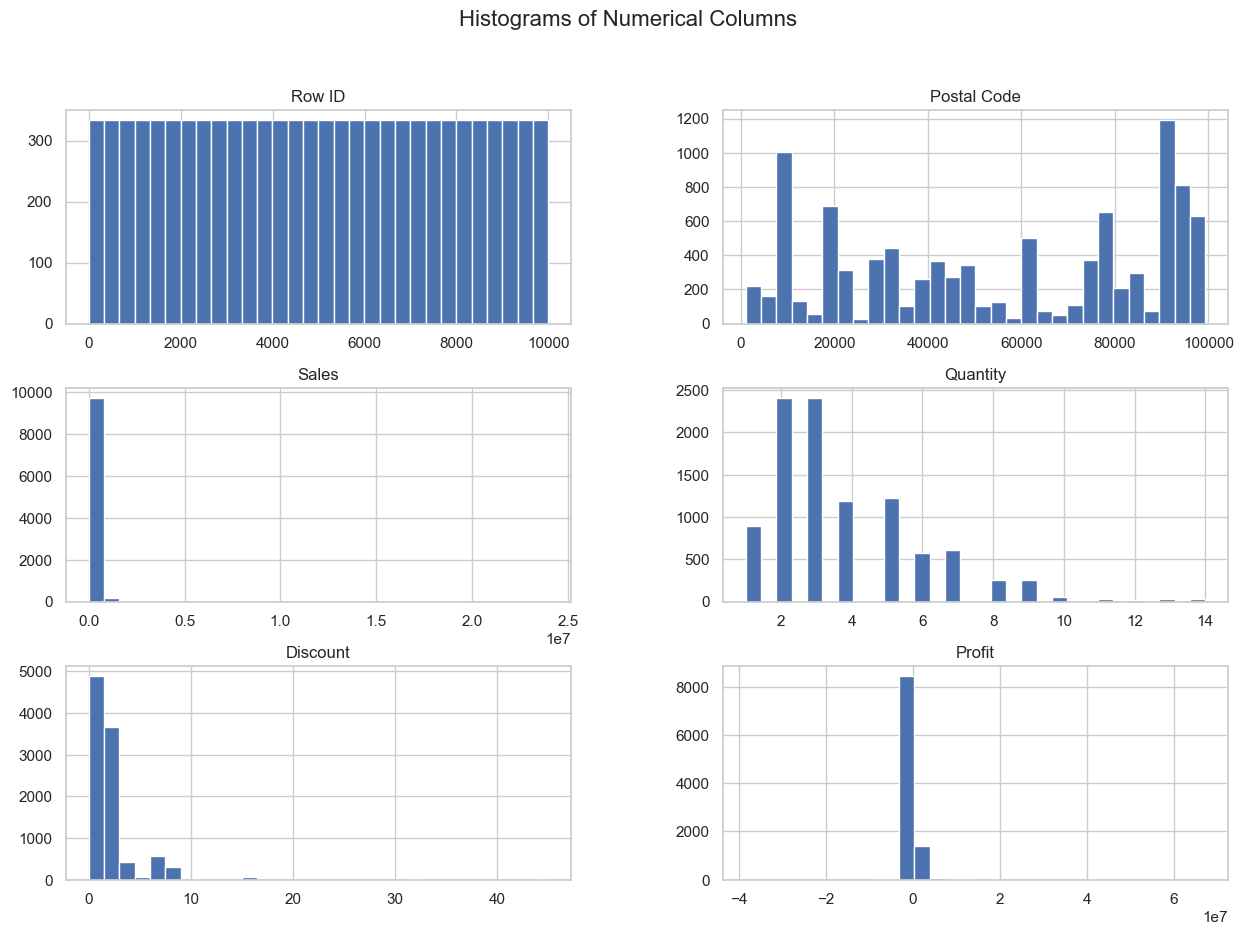

In [107]:
df.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Columns', fontsize=16)
plt.show()


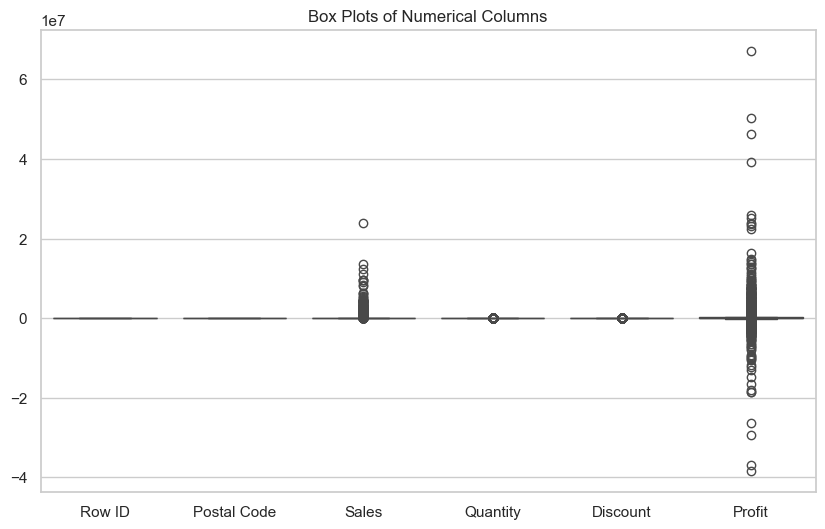

In [109]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.title('Box Plots of Numerical Columns')
plt.show()


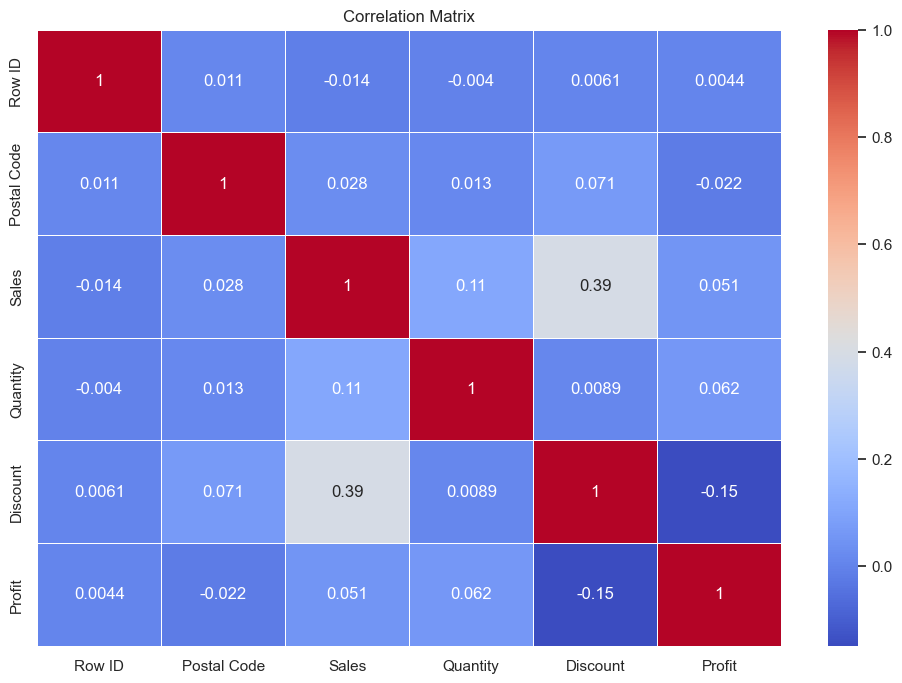

In [111]:
# Exclude non-numeric columns like 'ID' when creating the correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


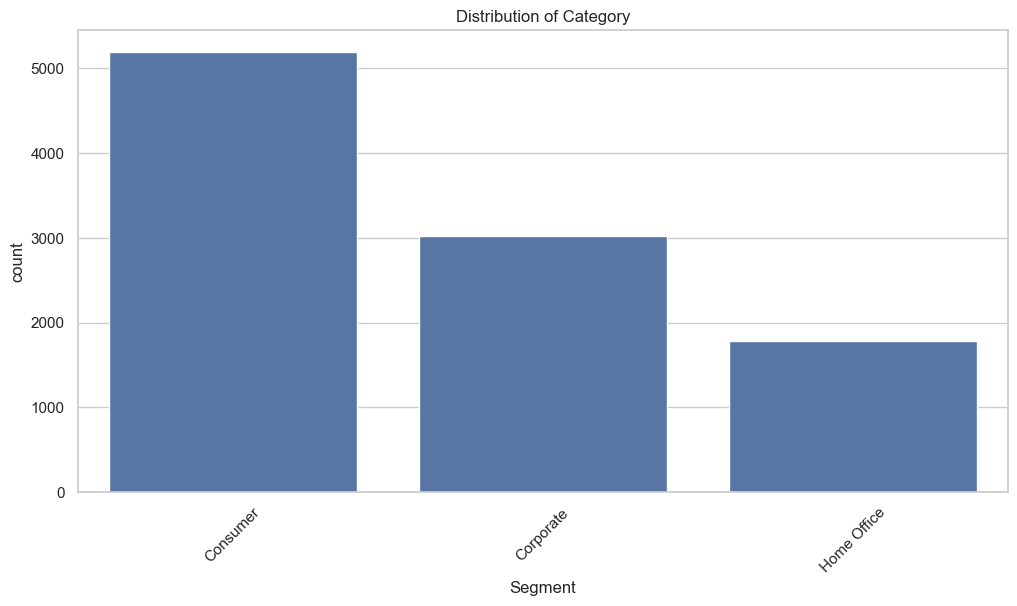

In [113]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Segment')
plt.title('Distribution of Category')
plt.xticks(rotation=45)
plt.show()

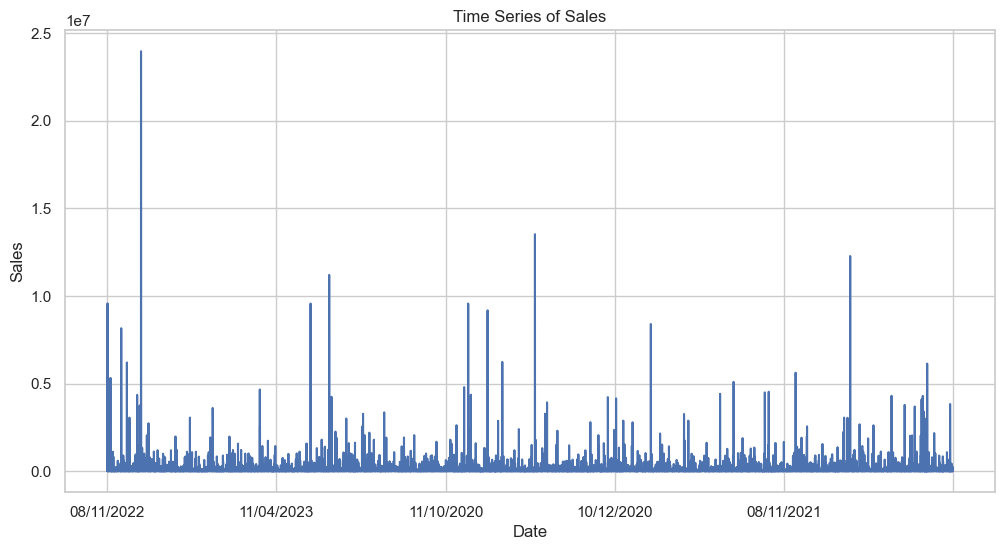

In [139]:
# Set 'Order Date' as index
df['Date'] = df['Order Date']
df.set_index('Order Date', inplace=True)

# Plot a time series for a numeric column (e.g., 'Sales')
plt.figure(figsize=(12, 6))
df['Sales'].plot()
plt.title('Time Series of Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

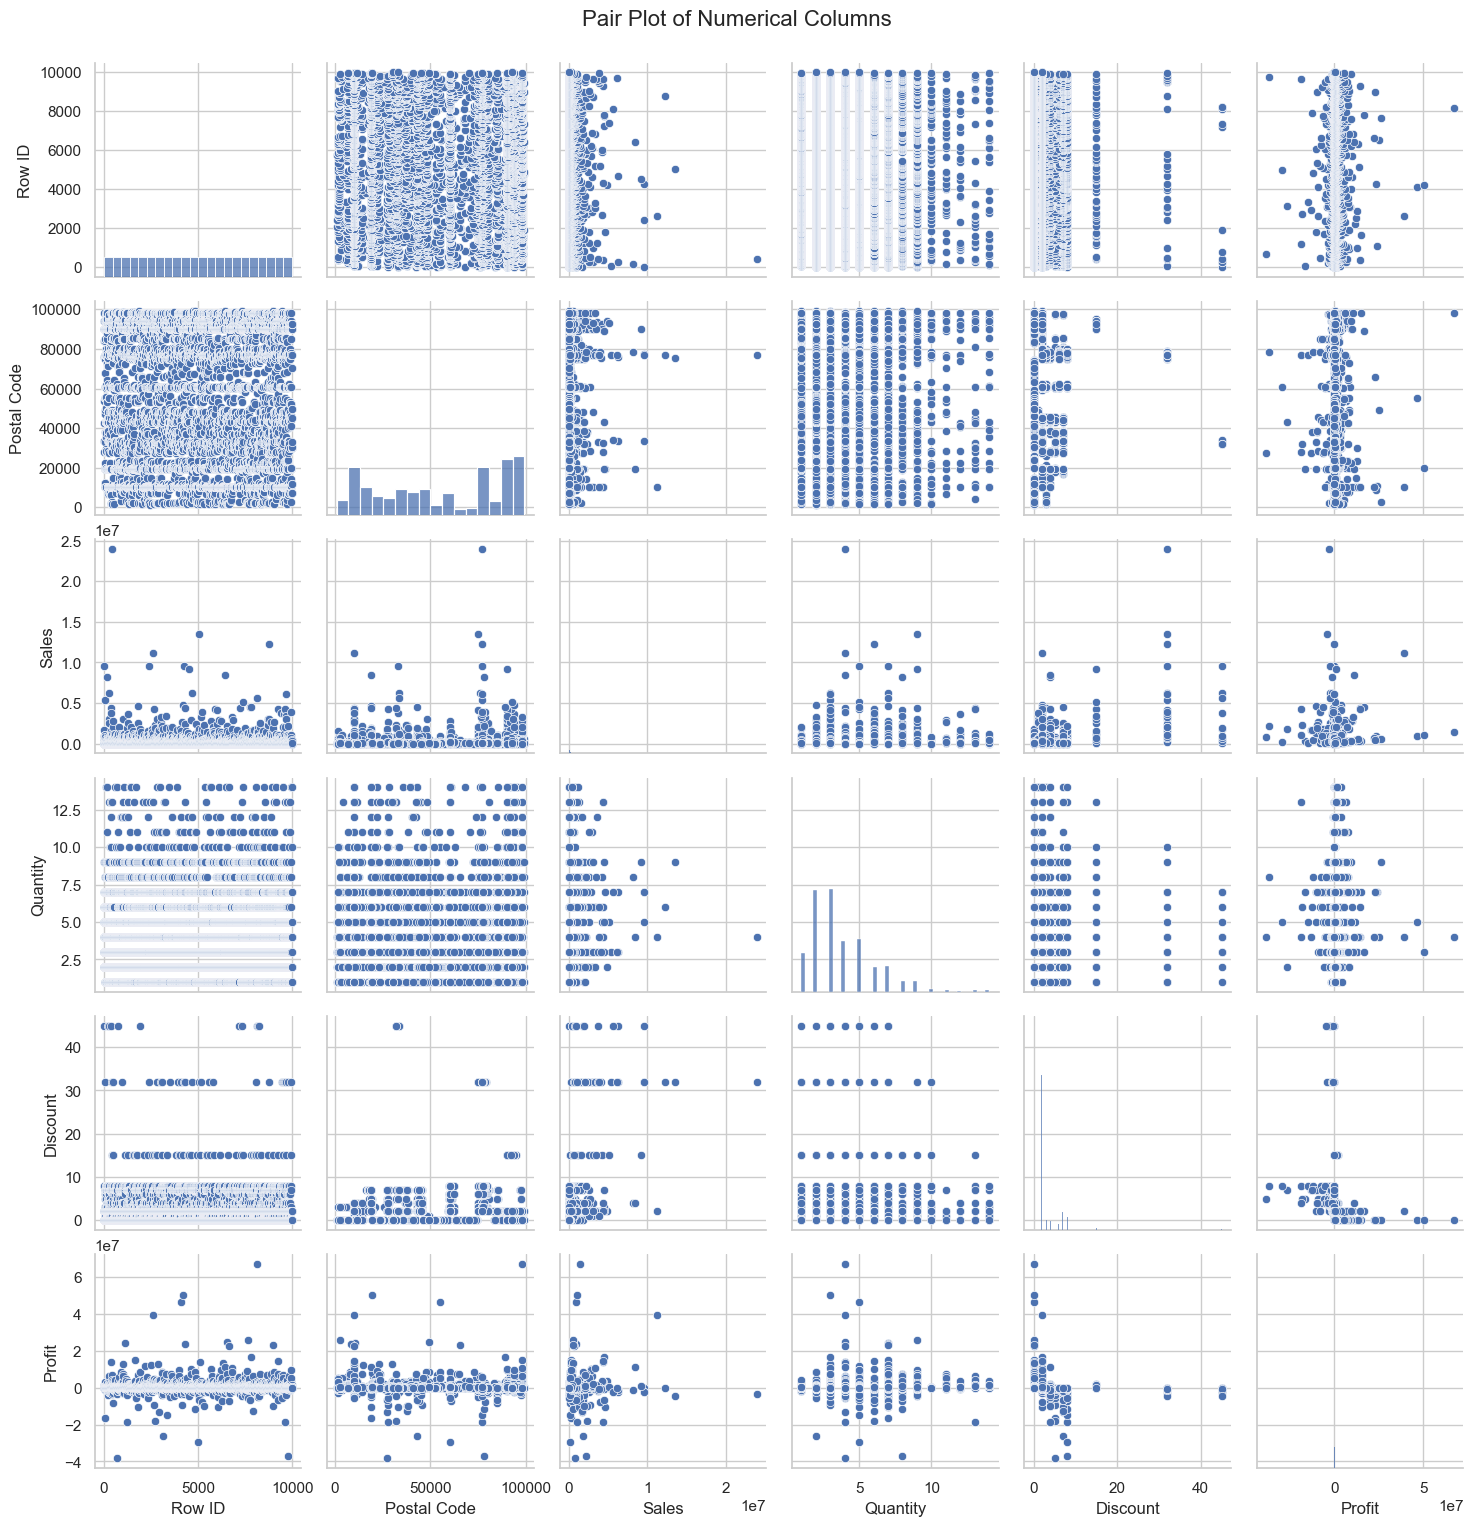

In [67]:
sns.pairplot(df.select_dtypes(include=['float64', 'int64']))
plt.suptitle('Pair Plot of Numerical Columns', y=1.02, fontsize=16)
plt.show()

In [141]:
df

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Segment,Postal Code,Product ID,Sales,Quantity,Discount,Profit,Date
Order Date,,,,,,,,,,,,,
08/11/2022,1,CA-2022-152156,11/11/2022,Second Class,CG-12520,Consumer,42420,FUR-BO-10001798,26196,2,0,419136,08/11/2022
08/11/2022,2,CA-2022-152156,11/11/2022,Second Class,CG-12520,Consumer,42420,FUR-CH-10000454,73194,3,0,219582,08/11/2022
12/06/2022,3,CA-2022-138688,16/06/2022,Second Class,DV-13045,Corporate,90036,OFF-LA-10000240,1462,2,0,68714,12/06/2022
11/10/2021,4,US-2021-108966,18/10/2021,Standard Class,SO-20335,Consumer,33311,FUR-TA-10000577,9575775,5,45,-383031,11/10/2021
11/10/2021,5,US-2021-108966,18/10/2021,Standard Class,SO-20335,Consumer,33311,OFF-ST-10000760,22368,2,2,25164,11/10/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21/01/2020,9990,CA-2020-110422,23/01/2020,Second Class,TB-21400,Consumer,33180,FUR-FU-10001889,25248,3,2,41028,21/01/2020
26/02/2023,9991,CA-2023-121258,03/03/2023,Standard Class,DB-13060,Consumer,92627,FUR-FU-10000747,9196,2,0,156332,26/02/2023
26/02/2023,9992,CA-2023-121258,03/03/2023,Standard Class,DB-13060,Consumer,92627,TEC-PH-10003645,258576,2,2,193932,26/02/2023


In [153]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Check for any missing values
df.isnull().sum()


Row ID         0
Order ID       0
Ship Date      0
Ship Mode      0
Customer ID    0
Segment        0
Postal Code    0
Product ID     0
Sales          0
Quantity       0
Discount       0
Profit         0
dtype: int64

In [181]:
df

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Segment,Postal Code,Product ID,Sales,Quantity,Discount,Profit
Date,,,,,,,,,,,,
2020-01-31,3366.0,CA-2020-115161,02/02/2020,First Class,LC-17050,Consumer,92691.0,FUR-BO-10003966,290666.0,2.0,15.0,34196.0
2020-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-31,53453.0,CA-2020-128055CA-2020-128055CA-2020-112403US-2...,05/04/202005/04/202031/03/202004/04/202004/04/...,Standard ClassStandard ClassSame DayStandard C...,AA-10315AA-10315JO-15280DD-13570DD-13570KB-162...,ConsumerConsumerConsumerConsumerConsumerCorpor...,462606.0,OFF-BI-10004390OFF-AP-10002765OFF-BI-10003529O...,1911870.0,29.0,37.0,1368849.0
2020-04-30,22278.0,CA-2020-156006CA-2020-160094CA-2020-160094,02/05/202002/05/202002/05/2020,Second ClassFirst ClassFirst Class,TM-21010JM-16195JM-16195,ConsumerConsumerConsumer,119640.0,TEC-AC-10002550OFF-AR-10004010OFF-ST-10000585,23100.0,13.0,0.0,229449.0
2020-05-31,15957.0,CA-2020-166051CA-2020-166051,05/06/202005/06/2020,Standard ClassStandard Class,JK-15625JK-15625,ConsumerConsumer,78424.0,TEC-PH-10002680TEC-PH-10002538,77370.0,6.0,0.0,527808.0
2020-06-30,34961.0,CA-2020-146640CA-2020-123064CA-2020-109218CA-2...,05/07/202002/07/202003/07/202004/07/202004/07/...,Standard ClassFirst ClassSecond ClassStandard ...,HA-14905RA-19915AR-10825MS-17980MS-17980CS-118...,ConsumerConsumerCorporateCorporateCorporateCon...,363296.0,OFF-BI-10002867OFF-AR-10004582OFF-AR-10001374O...,677686.0,38.0,12.0,2269924.0
2020-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-31,3478.0,CA-2020-143385,05/09/2020,Standard Class,SJ-20500,Consumer,87505.0,TEC-AC-10001635,9252.0,9.0,0.0,18504.0
2020-09-30,19962.0,CA-2020-102008US-2020-167633CA-2020-140886CA-2...,04/10/202005/10/202004/10/202004/10/202006/10/...,Standard ClassStandard ClassStandard ClassStan...,RA-19915BW-11200KW-16570DB-13615MH-17785DM-12955,ConsumerConsumerConsumerConsumerCorporateCorpo...,233644.0,OFF-PA-10004092OFF-PA-10004888OFF-AP-10000696O...,929770.0,26.0,8.0,952652.0


In [185]:
df['Sales'].fillna(0, inplace=True)

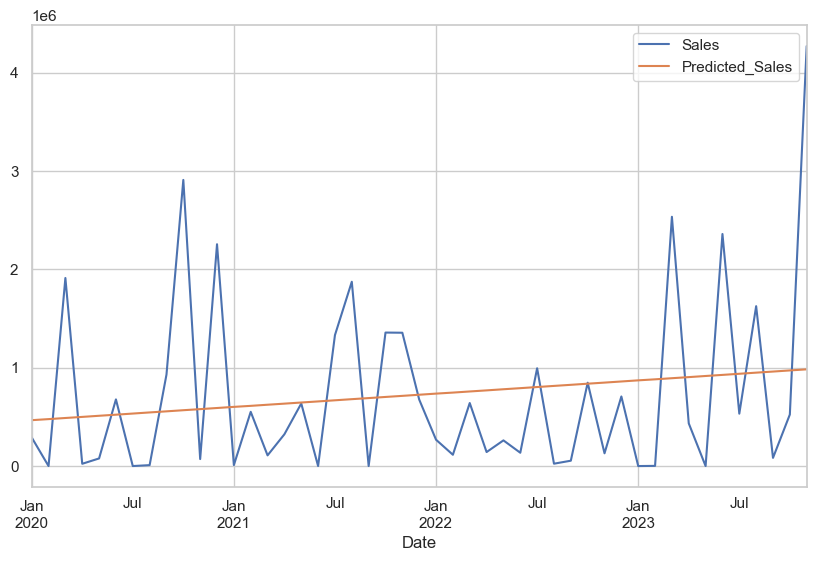

In [187]:
from sklearn.linear_model import LinearRegression


df['Date_Ordinal'] = df.index.map(lambda x: x.toordinal())

X = df[['Date_Ordinal']]
y = df['Sales']

model = LinearRegression()
model.fit(X, y)

df['Predicted_Sales'] = model.predict(X)

df[['Sales', 'Predicted_Sales']].plot(figsize=(10, 6))
plt.show()
